Basic Imports

In [43]:
!pip install pyproj
!pip install geopandas

Import the libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyproj #coordinate transformation library - for converting easting and northing to latitude and longitude
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt


LOAD THE DATA

In [45]:
df = pd.read_csv("london_fire_brigade_service_calls.csv")
df.head()

,address_qualifier,borough_code,borough_name,cal_year,date_of_call,easting_m,easting_rounded,first_pump_arriving_attendance_time,first_pump_arriving_deployed_from_station,frs,...,property_type,second_pump_arriving_attendance_time,second_pump_arriving_deployed_from_station,special_service_type,stop_code_description,time_of_call,timestamp_of_call,ward_code,ward_name,ward_name_new
0,Within same building,E09000007,CAMDEN,2017,2017-01-20,529459.0,529450,359.0,Euston,London,...,Purpose built office,NaN,NaN,NaN,AFA,08:57:38,2017-01-20 08:57:38,E05000129,BLOOMSBURY,BLOOMSBURY
1,Within same building,E09000025,NEWHAM,2017,2017-04-21,NaN,539650,211.0,Stratford,London,...,Purpose Built Flats/Maisonettes - Up to 3 storeys,NaN,NaN,No action (not false alarm),Special Service,17:42:29,2017-04-21 17:42:29,E05000494,WEST HAM,WEST HAM
2,Correct incident location,E09000031,WALTHAM FOREST,2017,2017-01-20,536990.0,536950,NaN,NaN,London,...,Local Government Office,NaN,NaN,Lift Release,Special Service,18:21:32,2017-01-20 18:21:32,E05000608,WILLIAM MORRIS,WILLIAM MORRIS
3,Within same building,E09000009,EALING,2017,2017-03-07,516686.0,516650,295.0,Ealing,London,...,Underground car park,660.0,Southall,Hazardous Materials incident,Special Service,11:27:50,2017-03-07 11:27:50,E05000192,WALPOLE,WALPOLE
4,Correct incident location,E09000032,WANDSWORTH,2017,2017-02-04,524266.0,524250,533.0,Battersea,London,...,Pub/wine bar/bar,NaN,NaN,Medical Incident - Co-responder,Special Service,17:31:10,2017-02-04 17:31:10,E05000625,THAMESFIELD,THAMESFIELD


Descriptive Statistics

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32247 entries, 0 to 32246
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   address_qualifier                           32247 non-null  object 
 1   borough_code                                32247 non-null  object 
 2   borough_name                                32247 non-null  object 
 3   cal_year                                    32247 non-null  int64  
 4   date_of_call                                32247 non-null  object 
 5   easting_m                                   16836 non-null  float64
 6   easting_rounded                             32247 non-null  int64  
 7   first_pump_arriving_attendance_time         30428 non-null  float64
 8   first_pump_arriving_deployed_from_station   30428 non-null  object 
 9   frs                                         32247 non-null  object 
 10  hour_of_ca

In [47]:
df.describe()

,cal_year,easting_m,easting_rounded,first_pump_arriving_attendance_time,hour_of_call,northing_m,northing_rounded,num_pumps_attending,num_stations_with_pumps_attending,second_pump_arriving_attendance_time
count,32247.0,16836.000000,32247.000000,30428.000000,32247.000000,16836.000000,32247.000000,32179.000000,32179.000000,11966.000000
mean,2017.0,530667.828582,530641.174373,318.230380,13.465222,180366.958363,180429.501969,1.536375,1.356537,399.082233
std,0.0,10436.093085,9855.434367,136.384571,6.152739,7534.304839,7446.092421,0.741248,0.611400,153.426914
min,2017.0,493654.000000,492450.000000,2.000000,0.000000,152868.000000,152850.000000,1.000000,1.000000,4.000000
25%,2017.0,525061.000000,525150.000000,232.000000,9.000000,175863.000000,175950.000000,1.000000,1.000000,299.000000
50%,2017.0,530716.000000,530850.000000,298.000000,14.000000,180962.000000,180950.000000,1.000000,1.000000,372.000000
75%,2017.0,536994.500000,536450.000000,379.000000,18.000000,185018.250000,185150.000000,2.000000,2.000000,464.000000
max,2017.0,560804.000000,563150.000000,1196.000000,23.000000,204891.000000,224250.000000,7.000000,6.000000,1195.000000


In [48]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
address_qualifier                                 0
borough_code                                      0
borough_name                                      0
cal_year                                          0
date_of_call                                      0
easting_m                                     15411
easting_rounded                                   0
first_pump_arriving_attendance_time            1819
first_pump_arriving_deployed_from_station      1819
frs                                               0
hour_of_call                                      0
incident_group                                    0
incident_number                                   0
incident_station_ground                           0
northing_m                                    15411
northing_rounded                                  0
num_pumps_attending                              68
num_stations_with_pumps_attending                68
postcode_district                               

In [49]:
df.describe(include=['object', 'category'])

,address_qualifier,borough_code,borough_name,date_of_call,first_pump_arriving_deployed_from_station,frs,incident_group,incident_number,incident_station_ground,postcode_district,...,property_category,property_type,second_pump_arriving_deployed_from_station,special_service_type,stop_code_description,time_of_call,timestamp_of_call,ward_code,ward_name,ward_name_new
count,32247,32247,32247,32247,30428,32247,32247,32247,32247,32247,...,32247,32247,11966,10081,32247,32247,32247,32247,32247,32247
unique,11,34,34,120,103,2,3,32247,103,318,...,9,260,102,21,9,26274,32236,655,631,631
top,Correct incident location,E09000033,WESTMINSTER,2017-02-23,Soho,London,False Alarm,008148-20012017,Soho,CR0,...,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Soho,Flooding,AFA,18:03:40,2017-03-14 10:57:56,E05000649,WEST END,WEST END
freq,19267,2469,2469,525,1205,32078,15732,1,1247,612,...,15240,3823,375,2061,11811,6,2,623,623,623


From the above data we can already see that the ward_name and ward_name_new columns look extremely similar. Let's check

In [50]:
#To compare elements in both columns
(df["ward_name"] == df["ward_name_new"]).all()

True

The above is a confirmation of similarity, therefore we drop one of the columns; ward_name_new

Similarly, we see that cal_year has a five number summary of 2017 and a std of 0, which means that it only has the value 2017 in it. This column does not provide any valuable insights for our model, there is no information gain, so we can safely delete it.

According to [https://www.llanellich.org.uk/] The UK Ordnance Survey grid is a grid of 100 kilometre squares with a true origin at 49° North and 2° West.  

Eastings: How far east (right) a point is from the origin (measured in meters) - easting_m  
Northings: How far north (up) a point is from the origin (measured in meters) - northing_m  

 Since we have two columns with no missing values rounded to 50 meters, namely easting_rounded and northing rounded, we can use these columns for our analysis and modelling instead of the original columns. The problem we are exploring does not explore effects of precise distances, like in the case of routing. Deleting these two columns as well.

In [51]:
df.drop(columns=["ward_name_new", "cal_year", "easting_m", "northing_m"], inplace=True)

In [52]:
df.drop(columns=['ward_code'], inplace=True)

borough_code, borough_name and proper_case are all indicators of the borough of each request. This creates redundancy, so it is better to just have one. Let's see if both the borough_name and proper_case are identical first.

In [53]:
(df['borough_name'].str.lower().eq(df['proper_case'].str.lower())).all()


True

Therefore, we drop both borough_code and borough_name and rename proper_case to borough_name because it looks cleaner. 

We remove incident_number since it has no predictive power.

In [54]:
df.drop(columns=["borough_code", "borough_name", "incident_number"], inplace=True)
df.rename(columns={"proper_case": "borough_name"}, inplace=True)

By looking at a few records in incident_group and stop_code_description, we can see a lot of similar categorical variables, so it is possible that incident_group is a higher level abstraction of stop_code_description. This causes feature redundancy and it is better to just keep the more granular one(stop_code_description). To confirm the relationship we can check if stop_code_description fits within incident_group.

In [55]:
df.groupby("stop_code_description")["incident_group"].nunique()

stop_code_description
AFA                                      1
Chimney Fire                             1
False alarm - Good intent                1
False alarm - Malicious                  1
Flood call attended - Batch mobilised    1
Late Call                                1
Primary Fire                             1
Secondary Fire                           1
Special Service                          1
Name: incident_group, dtype: int64

Since there is exactly one incident group that corresponds to each stop code, we can confirm the relationship and safely remove incident group. For future reference, we need to be careful with stop_code_description since it depends on the outcome, not on information known at the time of dispatch. The value is updated only after the incident is handled, which makes our model susceptible to target leakage.

In [56]:
df.drop(columns=["incident_group"], inplace=True)

It seems as though easting_m, first_pump_arriving_attendance_time, first_pump_arriving_deployed_from_station, northing_m, num_pumps_attending, num_stations_with_pumps_attending, postcode_full

In [57]:
#checking for missing values within each column in my dataset
# percentage of missing values in each column
missing_values = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
display(missing_values[missing_values > 0])


Percentage of missing values in each column:


first_pump_arriving_attendance_time            5.640835
first_pump_arriving_deployed_from_station      5.640835
num_pumps_attending                            0.210872
num_stations_with_pumps_attending              0.210872
postcode_full                                 47.790492
second_pump_arriving_attendance_time          62.892672
second_pump_arriving_deployed_from_station    62.892672
special_service_type                          68.738177
dtype: float64

The missing values for second pump data are not random - they represent situations where only one pump was needed. This is valuable information about incident severity

The missingness itself is informative for the second pump columns. It tells us that the incident only required one pump, which indicates lower severity. By creating a feature that captures this information, you preserve the relationship between incident severity and response requirements.

In [58]:
print(df['second_pump_arriving_attendance_time'].describe())
print(df['second_pump_arriving_deployed_from_station'].isnull().sum())

count    11966.000000
mean       399.082233
std        153.426914
min          4.000000
25%        299.000000
50%        372.000000
75%        464.000000
max       1195.000000
Name: second_pump_arriving_attendance_time, dtype: float64
20281


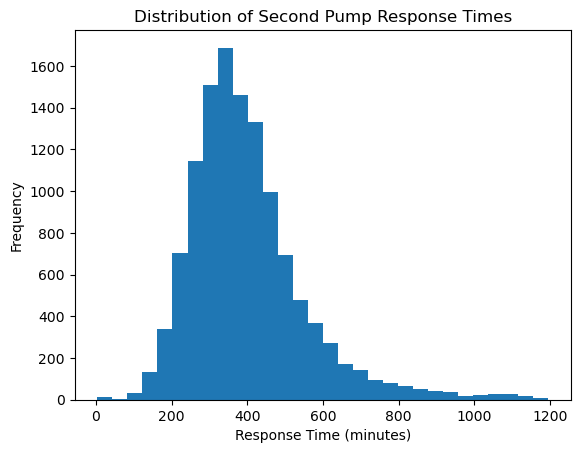

In [59]:
#check for outliers 

plt.hist(df['second_pump_arriving_attendance_time'].dropna(), bins=30)
plt.title("Distribution of Second Pump Response Times")
plt.xlabel("Response Time (minutes)")
plt.ylabel("Frequency")
plt.show()

we decided to use domain expertise knowledge and put a capping instead to filter out the outliers

A comparison with first pump data

In [81]:

difference= df['first_pump_arriving_attendance_time'].notnull() & df['second_pump_arriving_attendance_time'].notnull()

#Check if any second pump times are less than the first pump times
inconsistent = df[difference & (df['second_pump_arriving_attendance_time'] < df['first_pump_arriving_attendance_time'])]
print("Inconsistent records (second pump faster than first):", inconsistent.shape[0])


Inconsistent records (second pump faster than first): 95


In [82]:
print(inconsistent)

                      address_qualifier date_of_call  easting  \
89                 Within same building   2017-04-25   533750   
160           Correct incident location   2017-02-13   529050   
212           Correct incident location   2017-03-23   527150   
887    On land associated with building   2017-04-30   524450   
950           Correct incident location   2017-04-29   525950   
...                                 ...          ...      ...   
31000              Within same building   2017-04-25   534350   
31141         Correct incident location   2017-02-12   535050   
31551         Correct incident location   2017-01-13   533450   
31564              Within same building   2017-03-06   530850   
31892         Correct incident location   2017-03-03   530050   

       first_pump_arriving_attendance_time  \
89                                   540.0   
160                                  291.0   
212                                  313.0   
887                                

We need to decide what to do with the inconsistent rows in the case where the second pump is faster than the first.

In [83]:
#the time between the first and second pump arriving at the scene in seconds
df['time_between_pumps'] = df['second_pump_arriving_attendance_time'] - df['first_pump_arriving_attendance_time']
print (df['time_between_pumps'] )

0          NaN
1          NaN
3        365.0
4          NaN
5        101.0
         ...  
32242     47.0
32243      NaN
32244     89.0
32245     38.0
32246    195.0
Name: time_between_pumps, Length: 30428, dtype: float64


NaN's were left and not removed, reason for this is: To keep the missing values as is and use methods that can handle NaN values. This is the most accurate representation since there genuinely was no "time between pumps" for single-pump incidents.

Handling missing values for second_pump_arriving_deployed_from_station:
If the values were missing this was because there was no second pump, this was done in order to preserve missingness information for second pump arrival.

In [63]:
#Creating a categorical feature that preserves the "missingness" information for second pump arriving
#df['second_pump_arriving_deployed_from_station'] = df['second_pump_arriving_deployed_from_station'].fillna('No_Station')

If the second pump time is missing, we can crate a flag. The missing second pump time is an indicator that the second pump is not required. Encoding to binary 0 and 1

In [84]:
# For the second pump time, if missing create a flag
df['second_pump_deployed'] = df['second_pump_arriving_attendance_time'].notna().astype(int)
print(df['second_pump_deployed'])

0        0
1        0
3        1
4        0
5        1
        ..
32242    1
32243    0
32244    1
32245    1
32246    1
Name: second_pump_deployed, Length: 30428, dtype: int64


In [65]:
df.head()

,address_qualifier,date_of_call,easting_rounded,first_pump_arriving_attendance_time,first_pump_arriving_deployed_from_station,frs,hour_of_call,incident_station_ground,northing_rounded,num_pumps_attending,...,property_type,second_pump_arriving_attendance_time,second_pump_arriving_deployed_from_station,special_service_type,stop_code_description,time_of_call,timestamp_of_call,ward_name,time_between_pumps,second_pump_deployed
0,Within same building,2017-01-20,529450,359.0,Euston,London,8,Euston,182050,1.0,...,Purpose built office,NaN,NaN,NaN,AFA,08:57:38,2017-01-20 08:57:38,BLOOMSBURY,NaN,0
1,Within same building,2017-04-21,539650,211.0,Stratford,London,17,Stratford,183750,1.0,...,Purpose Built Flats/Maisonettes - Up to 3 storeys,NaN,NaN,No action (not false alarm),Special Service,17:42:29,2017-04-21 17:42:29,WEST HAM,NaN,0
2,Correct incident location,2017-01-20,536950,NaN,NaN,London,18,Walthamstow,189350,1.0,...,Local Government Office,NaN,NaN,Lift Release,Special Service,18:21:32,2017-01-20 18:21:32,WILLIAM MORRIS,NaN,0
3,Within same building,2017-03-07,516650,295.0,Ealing,London,11,Ealing,180250,2.0,...,Underground car park,660.0,Southall,Hazardous Materials incident,Special Service,11:27:50,2017-03-07 11:27:50,WALPOLE,365.0,1
4,Correct incident location,2017-02-04,524250,533.0,Battersea,London,17,Wandsworth,174950,1.0,...,Pub/wine bar/bar,NaN,NaN,Medical Incident - Co-responder,Special Service,17:31:10,2017-02-04 17:31:10,THAMESFIELD,NaN,0


Renaming of easting_rounded, northing_rounded to easting and northing respectively to make it clear they are the primary coordinates.

In [66]:

df.rename(columns={
    'easting_rounded': 'easting',
    'northing_rounded': 'northing'
}, inplace=True)

The rows containing 'Nan' values for first_pump_arriving_attendence_time were removed this is because we coudn't make sense of why the values were missing, and also the num_pumps_attending column still contained values, however no pumps were deployed so we couldnt figure out why this was case.

The greatest concern was how pumps can be counted as attending if there's no record of their arrival time? The was need to investigate this.

There were several possible explanations for this inconsistency:
- Data recording errors.
- Incidents where pumps were dispatched but then recalled before arriving.
- Special administrative cases where pumps were "assigned" but didn't physically respond.
- Incidents that were handed off to other agencies.

In [67]:
missing_first_pump = df[df['first_pump_arriving_attendance_time'].isnull()]

df.head()

,address_qualifier,date_of_call,easting,first_pump_arriving_attendance_time,first_pump_arriving_deployed_from_station,frs,hour_of_call,incident_station_ground,northing,num_pumps_attending,...,property_type,second_pump_arriving_attendance_time,second_pump_arriving_deployed_from_station,special_service_type,stop_code_description,time_of_call,timestamp_of_call,ward_name,time_between_pumps,second_pump_deployed
0,Within same building,2017-01-20,529450,359.0,Euston,London,8,Euston,182050,1.0,...,Purpose built office,NaN,NaN,NaN,AFA,08:57:38,2017-01-20 08:57:38,BLOOMSBURY,NaN,0
1,Within same building,2017-04-21,539650,211.0,Stratford,London,17,Stratford,183750,1.0,...,Purpose Built Flats/Maisonettes - Up to 3 storeys,NaN,NaN,No action (not false alarm),Special Service,17:42:29,2017-04-21 17:42:29,WEST HAM,NaN,0
2,Correct incident location,2017-01-20,536950,NaN,NaN,London,18,Walthamstow,189350,1.0,...,Local Government Office,NaN,NaN,Lift Release,Special Service,18:21:32,2017-01-20 18:21:32,WILLIAM MORRIS,NaN,0
3,Within same building,2017-03-07,516650,295.0,Ealing,London,11,Ealing,180250,2.0,...,Underground car park,660.0,Southall,Hazardous Materials incident,Special Service,11:27:50,2017-03-07 11:27:50,WALPOLE,365.0,1
4,Correct incident location,2017-02-04,524250,533.0,Battersea,London,17,Wandsworth,174950,1.0,...,Pub/wine bar/bar,NaN,NaN,Medical Incident - Co-responder,Special Service,17:31:10,2017-02-04 17:31:10,THAMESFIELD,NaN,0


In [68]:
missing_first_pump_percentage = (len(missing_first_pump) / len(df)) * 100
print(f"Percentage of missing values in 'first_pump_arriving_attendance_time': {missing_first_pump_percentage:.2f}%")


#removing the rows with missing values in the first pump arriving attendance time column
df.dropna(subset=['first_pump_arriving_attendance_time'], inplace=True)

# displaying number of rows of the dataset
print(f"Number of rows after dropping missing values: {len(df)}")

Percentage of missing values in 'first_pump_arriving_attendance_time': 5.64%
Number of rows after dropping missing values: 30428


In [69]:
# Calculate statistics
q1 = df['first_pump_arriving_attendance_time'].quantile(0.25)
q3 = df['first_pump_arriving_attendance_time'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr  
lower_bound = max(0, lower_bound) 

# Identify outliers
outliers = df[(df['first_pump_arriving_attendance_time'] > upper_bound) | 
              (df['first_pump_arriving_attendance_time'] < lower_bound)]

print(f"Number of outliers identified: {len(outliers)}")
print(f"Percentage of data: {len(outliers)/len(df)*100:.2f}%")

Number of outliers identified: 1261
Percentage of data: 4.14%


In [70]:
# Applying capping to response times
df['first_pump_arriving_attendance_time_capped'] = df['first_pump_arriving_attendance_time'].clip(
    lower=lower_bound, 
    upper=upper_bound
)

In [71]:
# showing that my capping worked
print(f"Original min: {df['first_pump_arriving_attendance_time'].min()}, max: {df['first_pump_arriving_attendance_time'].max()}")
print(f"Capped min: {df['first_pump_arriving_attendance_time_capped'].min()}, max: {df['first_pump_arriving_attendance_time_capped'].max()}")

Original min: 2.0, max: 1196.0
Capped min: 11.5, max: 599.5


FINAL DATAFRAME AFTER DATA CLEANING

In [72]:
df.head()

,address_qualifier,date_of_call,easting,first_pump_arriving_attendance_time,first_pump_arriving_deployed_from_station,frs,hour_of_call,incident_station_ground,northing,num_pumps_attending,...,second_pump_arriving_attendance_time,second_pump_arriving_deployed_from_station,special_service_type,stop_code_description,time_of_call,timestamp_of_call,ward_name,time_between_pumps,second_pump_deployed,first_pump_arriving_attendance_time_capped
0,Within same building,2017-01-20,529450,359.0,Euston,London,8,Euston,182050,1.0,...,NaN,NaN,NaN,AFA,08:57:38,2017-01-20 08:57:38,BLOOMSBURY,NaN,0,359.0
1,Within same building,2017-04-21,539650,211.0,Stratford,London,17,Stratford,183750,1.0,...,NaN,NaN,No action (not false alarm),Special Service,17:42:29,2017-04-21 17:42:29,WEST HAM,NaN,0,211.0
3,Within same building,2017-03-07,516650,295.0,Ealing,London,11,Ealing,180250,2.0,...,660.0,Southall,Hazardous Materials incident,Special Service,11:27:50,2017-03-07 11:27:50,WALPOLE,365.0,1,295.0
4,Correct incident location,2017-02-04,524250,533.0,Battersea,London,17,Wandsworth,174950,1.0,...,NaN,NaN,Medical Incident - Co-responder,Special Service,17:31:10,2017-02-04 17:31:10,THAMESFIELD,NaN,0,533.0
5,Correct incident location,2017-01-08,537350,247.0,Poplar,London,16,Poplar,181850,2.0,...,348.0,Millwall,NaN,Primary Fire,16:54:17,2017-01-08 16:54:17,BROMLEY SOUTH,101.0,1,247.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30428 entries, 0 to 32246
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   address_qualifier                           30428 non-null  object 
 1   date_of_call                                30428 non-null  object 
 2   easting                                     30428 non-null  int64  
 3   first_pump_arriving_attendance_time         30428 non-null  float64
 4   first_pump_arriving_deployed_from_station   30428 non-null  object 
 5   frs                                         30428 non-null  object 
 6   hour_of_call                                30428 non-null  int64  
 7   incident_station_ground                     30428 non-null  object 
 8   northing                                    30428 non-null  int64  
 9   num_pumps_attending                         30428 non-null  float64
 10  num_stations_wi

In [74]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
address_qualifier                                 0
date_of_call                                      0
easting                                           0
first_pump_arriving_attendance_time               0
first_pump_arriving_deployed_from_station         0
frs                                               0
hour_of_call                                      0
incident_station_ground                           0
northing                                          0
num_pumps_attending                               0
num_stations_with_pumps_attending                 0
postcode_district                                 0
postcode_full                                 14171
borough_name                                      0
property_category                                 0
property_type                                     0
second_pump_arriving_attendance_time          18480
second_pump_arriving_deployed_from_station    18480
special_service_type                          21

To visualise the missing data using a heat map

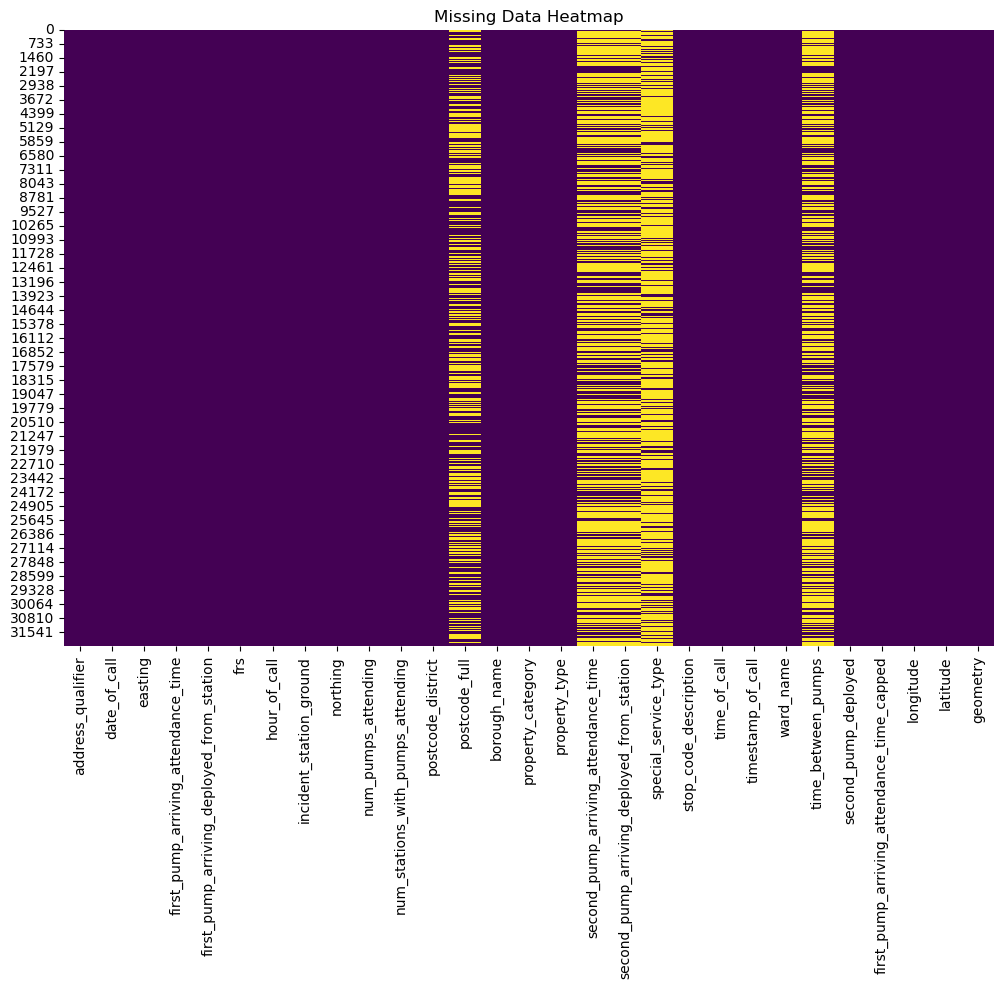

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

VISUALIZATIONS

Text(0, 0.5, 'Frequency')

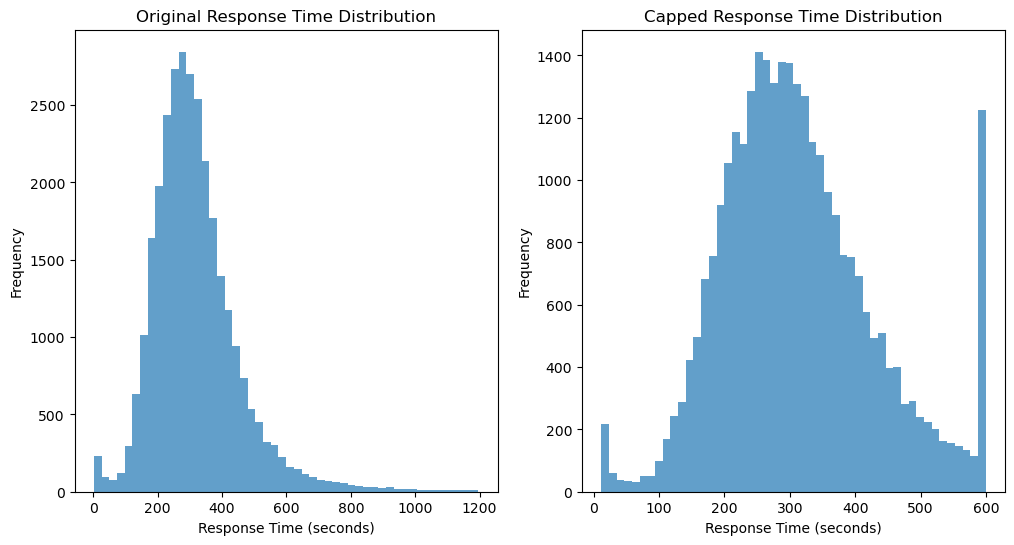

In [76]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['first_pump_arriving_attendance_time'], bins=50, alpha=0.7)
plt.title('Original Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['first_pump_arriving_attendance_time_capped'], bins=50, alpha=0.7)
plt.title('Capped Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

FEATURE ENGINEERING

1. Transforming the easting and northing values to longitude and latitude cooridinates

In the UK, the Ordnance Survey grid uses the OSGB36 coordinate system (easting/northing - EPSG:27700) while latitude and longitude are usually represented using the WGS84 system (EPSG:4326).
References: 
https://pyproj4.github.io/pyproj/stable/index.html - this gives a detailed explanation on conversion of OSGB36 coordinate systems to the  WGS84 coordinate system. 
https://epsg.io/transform#s_srs=27700&t_srs=4326&ops=7710&x=529450.0000000&y=182050.0000000 - this is a link to the online coordinate convertor.
https://en.wikipedia.org/wiki/World_Geodetic_System#WGS84 - provides more information on the World Geodetic System (WGS) with the currenty used version as WGS84.
https://en.wikipedia.org/wiki/Ordnance_Survey_National_Grid - Provides information on the  Ordnance Survey National Grid reference system (OSGB) which is the British National Grid system. 

In [77]:

#Transformer for conversion from OSGB36 (EPSG:27700) to WGS84 (EPSG:4326)
transformer = pyproj.Transformer.from_crs("EPSG:27700", "EPSG:4326", always_xy=True)

# Transform easting and northing values to longitude and latitude
# always_xy=True transform function follows the order,  X = easting and  Y = northing
df['longitude'], df['latitude'] = transformer.transform(df['easting'].values,
                                                        df['northing'].values)

print(df[['easting', 'northing', 'longitude', 'latitude']].head())


   easting  northing  longitude   latitude
0   529450    182050  -0.135522  51.522540
1   539650    183750   0.012079  51.535388
3   516650    180250  -0.320524  51.509148
4   524250    174950  -0.212930  51.459898
5   537350    181850  -0.021801  51.518878


option 2:

In [78]:
#using point object from shapely library
df['geometry'] = df.apply(lambda row: Point(row['easting'], row['northing']), axis=1)

#convert dataframe to a geodataframe
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:27700")

#transformation to wgs84
gdf_wgs84 = gdf.to_crs(epsg=4326)

#extraction of longitude and latitude
gdf_wgs84['longitude'] = gdf_wgs84.geometry.x
gdf_wgs84['latitude'] = gdf_wgs84.geometry.y

print(gdf_wgs84[['easting', 'northing', 'longitude', 'latitude']])

       easting  northing  longitude   latitude
0       529450    182050  -0.135522  51.522540
1       539650    183750   0.012079  51.535388
3       516650    180250  -0.320524  51.509148
4       524250    174950  -0.212930  51.459898
5       537350    181850  -0.021801  51.518878
...        ...       ...        ...        ...
32242   537850    170050  -0.019197  51.412720
32243   532850    165450  -0.092770  51.372574
32244   526250    183950  -0.180940  51.540338
32245   535050    177450  -0.056613  51.479893
32246   528250    195850  -0.147772  51.646829

[30428 rows x 4 columns]


In [79]:
2. Encoding

SyntaxError: invalid syntax (3257658625.py, line 1)